In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = 999
sns.set_style('whitegrid')

import dython
from dython.nominal import correlation_ratio
# https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/representationdetails/55d624fdad35c7e854cb21a4/

In [3]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('PHL_Building_Dataset_Clean.csv')
df.head()

,Unnamed: 0,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section
0,0,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,29.17,A,4.0,220 WHARTON ST,257500.0,2.0,3.0,6.0,2.0,E,ST,F,2625.3,1266.0,H,I,1960.0,RSA5,MASONRY,South
1,1,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.03,A,4.0,222 WHARTON ST,249400.0,2.0,3.0,6.0,2.0,E,ST,F,1622.7,1266.0,A,I,1960.0,RSA5,MASONRY,South
2,2,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.05,A,4.0,224 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1624.5,1266.0,A,I,1960.0,RSA5,MASONRY,South
3,3,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.08,A,4.0,226 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1627.2,1266.0,H,I,1960.0,RSA5,MASONRY,South
4,4,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.71,A,4.0,228 WHARTON ST,253800.0,2.0,3.0,6.0,2.0,E,ST,F,1683.9,1310.0,H,I,1960.0,RSA5,MASONRY,South


In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df.head()

,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section
0,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,29.17,A,4.0,220 WHARTON ST,257500.0,2.0,3.0,6.0,2.0,E,ST,F,2625.3,1266.0,H,I,1960.0,RSA5,MASONRY,South
1,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.03,A,4.0,222 WHARTON ST,249400.0,2.0,3.0,6.0,2.0,E,ST,F,1622.7,1266.0,A,I,1960.0,RSA5,MASONRY,South
2,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.05,A,4.0,224 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1624.5,1266.0,A,I,1960.0,RSA5,MASONRY,South
3,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.08,A,4.0,226 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1627.2,1266.0,H,I,1960.0,RSA5,MASONRY,South
4,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.71,A,4.0,228 WHARTON ST,253800.0,2.0,3.0,6.0,2.0,E,ST,F,1683.9,1310.0,H,I,1960.0,RSA5,MASONRY,South


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44484 entries, 0 to 44483
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   basements                  44484 non-null  object 
 1   building_code_description  44484 non-null  object 
 2   central_air                44484 non-null  object 
 3   depth                      44484 non-null  float64
 4   exterior_condition         44484 non-null  float64
 5   fireplaces                 44484 non-null  float64
 6   frontage                   44484 non-null  float64
 7   garage_type                44484 non-null  object 
 8   interior_condition         44484 non-null  float64
 9   location                   44484 non-null  object 
 10  market_value               44484 non-null  float64
 11  number_of_bathrooms        44484 non-null  float64
 12  number_of_bedrooms         44484 non-null  float64
 13  number_of_rooms            44484 non-null  flo

In [8]:
desc1 = []

for i in df.columns:
    desc1.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (df[i].isna().sum()/len(df)*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(1).values
    ])
    
pd.DataFrame(data = desc1,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,basements,object,0,0.0,11,[F]
1,building_code_description,object,0,0.0,212,[ROW W/DET GAR 2 STY MAS]
2,central_air,object,0,0.0,2,[Y]
3,depth,float64,0,0.0,6378,[84.45]
4,exterior_condition,float64,0,0.0,6,[3.0]
5,fireplaces,float64,0,0.0,6,[2.0]
6,frontage,float64,0,0.0,4146,[51.45]
7,garage_type,object,0,0.0,5,[C]
8,interior_condition,float64,0,0.0,6,[3.0]
9,location,object,0,0.0,44328,[1015 E DURHAM ST]


## Re-Categorize Data

In [9]:
# re-categorize topography
df['topography'] = df['topography'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6})

In [10]:
df['topography'].value_counts()

6    39500
1     4502
5      350
2      100
4       18
3       14
Name: topography, dtype: int64

In [11]:
# re-categorize zoning
df['zoning'] = df['zoning'].replace({'RSA5 ': 1, 'RSA4 ': 2, 'RSA3 ': 3, 'RSA2 ': 4, 'RSA1 ': 5, 'RSD3 ': 6, 'RSD2 ': 7, 'RSD1 ': 8})

In [12]:
df['zoning'].value_counts()
# Checking this all done for re-categorize

1    28962
3     8317
2     2307
6     2197
4     1859
8      601
5      231
7       10
Name: zoning, dtype: int64

# Unsupervised Machine Learning for Exploratory Data Analysis

### Clustering by market_value, total_area, total_liveable_area, zoning

In [13]:
cust = df[['market_value', 'total_area' ,'total_livable_area', 'zoning']].values

In [14]:
X = cust

# KMeans Model

From the  2- Data Processing Notebook, we choose KMeans Model for Clustering Residence per Segment with 5 clusters.

In [15]:
Model_KM = KMeans(n_clusters = 5, random_state=42)

In [16]:
Model_KM.fit(X)

KMeans(n_clusters=5, random_state=42)

In [17]:
cluster = Model_KM.predict(X)

In [18]:
df['segment'] = cluster

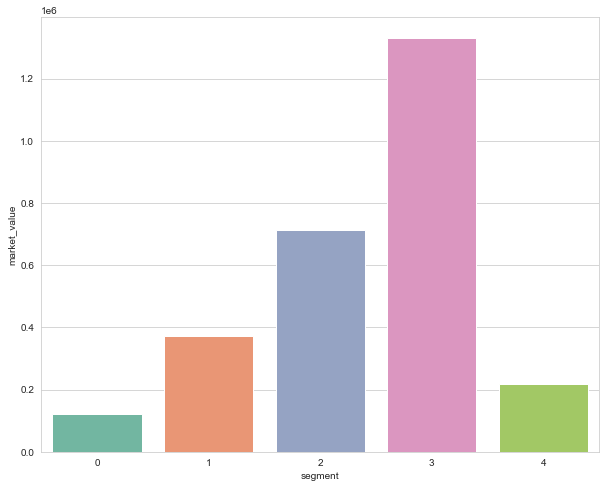

In [19]:
price = df[['segment','market_value']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(price['segment'], price['market_value'], palette ='Set2')
plt.show()

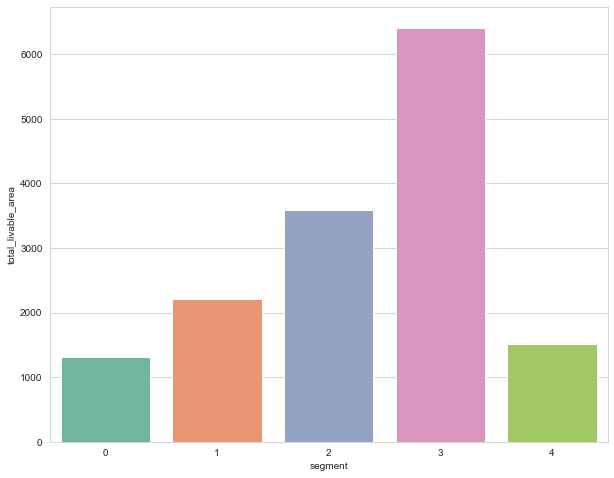

In [20]:
live = df[['total_livable_area', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(live['segment'], live['total_livable_area'], palette ='Set2')
plt.show()

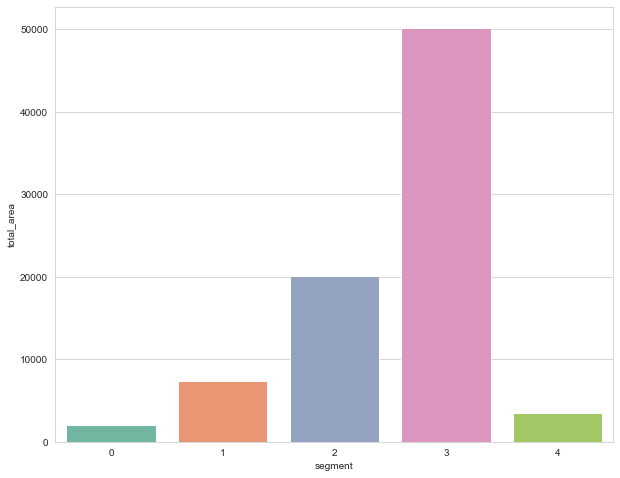

In [21]:
area = df[['total_area', 'segment']].groupby('segment').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(area['segment'], area['total_area'], palette = 'Set2')
plt.show()

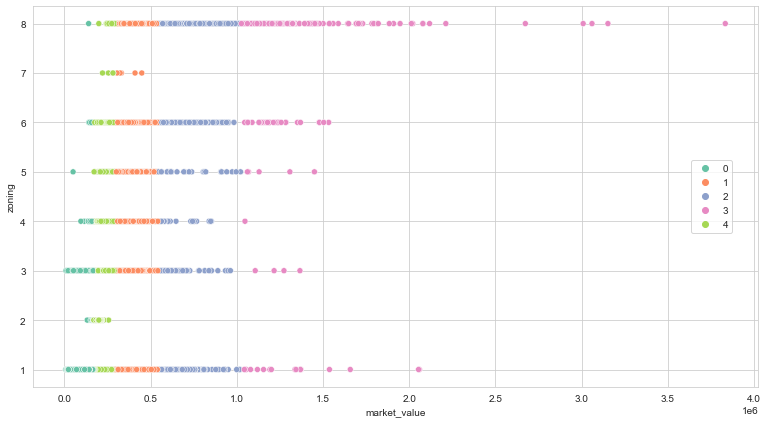

In [22]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'zoning', data=df, hue = 'segment', palette = 'Set2', legend='full').legend(loc='center left', bbox_to_anchor=(0.9, 0.5), ncol=1)
plt.show()

In [23]:
pd.crosstab(index=df['segment'], columns=df['zoning'])
# 0 -> low
# 1 -> middle
# 2 -> upper middle
# 3 -> top
# 4 -> lower middle

zoning,1,2,3,4,5,6,7,8
segment,,,,,,,,
0,21613,17,2208,81,1,17,0,1
1,1540,0,773,374,115,1197,5,128
2,117,0,80,22,27,220,0,294
3,17,0,4,1,5,28,0,156
4,5675,2290,5252,1381,83,735,5,22


In [24]:
df['segment'] = df['segment'].replace({0 : 1, 1 : 3, 2 : 4, 3 : 5, 4 : 2})

Segmentation from customers is more based on the market value of the property owned by the customer. To facilitate grouping, each group will be given a name.
- segment 0 -> low
- segment 1 -> middle
- segment 2 -> upper middle
- segment 3 -> top
- segment 4 -> lower middle

Then we need to change the number of the segmentation to be sequential to facilitate data analysis
- from segment 0 -> segment 1 -> low
- from segment 4 -> segment 2 -> lower middle
- from segment 1 -> segment 3 -> middle
- from segment 2 -> segment 4 -> upper middle
- from segment 3 -> segment 5 -> top

# Handling Outliers

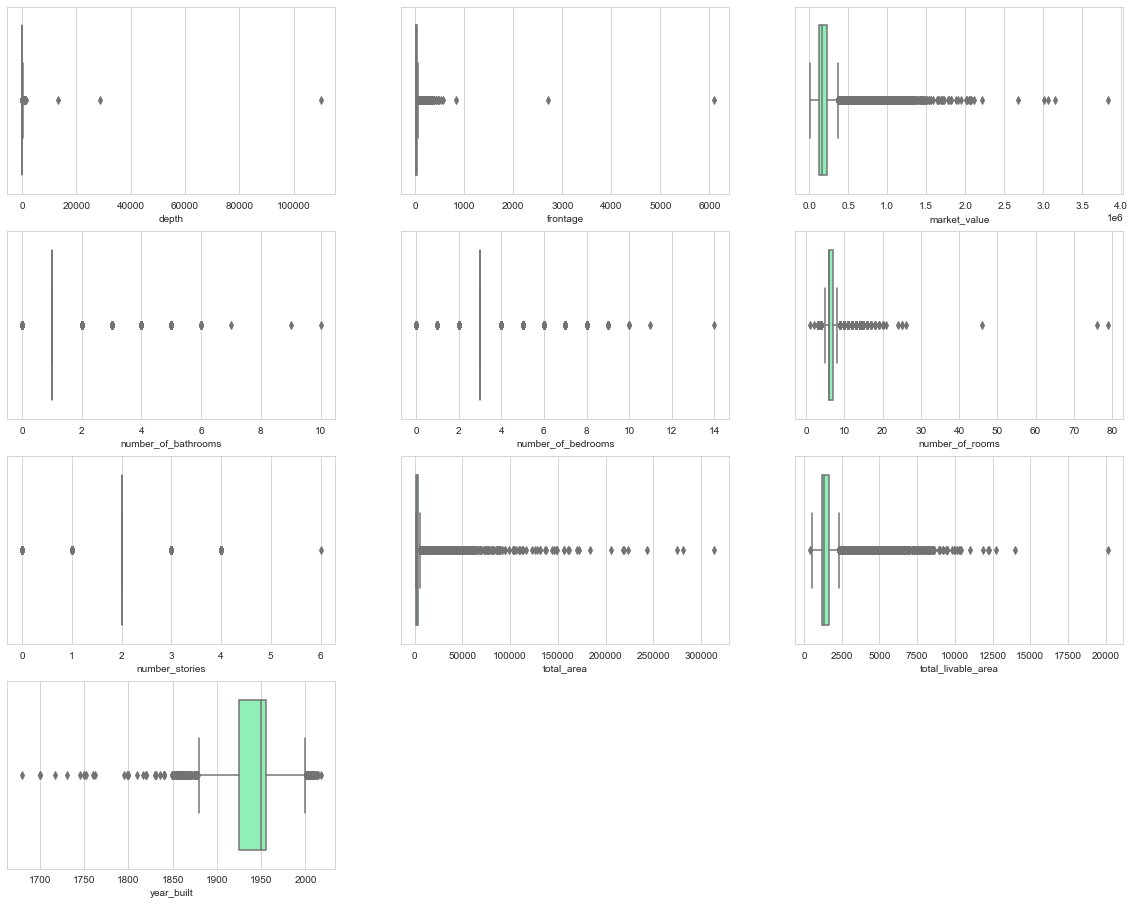

In [25]:
# Outliers by Boxplot
df_describe = df[['depth', 'frontage', 'market_value', 'number_of_bathrooms', 'number_of_bedrooms',
                                 'number_of_rooms', 'number_stories', 'total_area', 
                                 'total_livable_area', 'year_built']]

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(5,3,x)
    sns.boxplot(x=df_describe[column], palette='rainbow')
    x+=1
plt.tight_layout
plt.show()

From this continuous numerical columns, as we can see from the boxplot, there are outliers in every columns, so we decide to ignore them because we want to analyze from the original data and the outliers is still acceptable.

# Handling Data

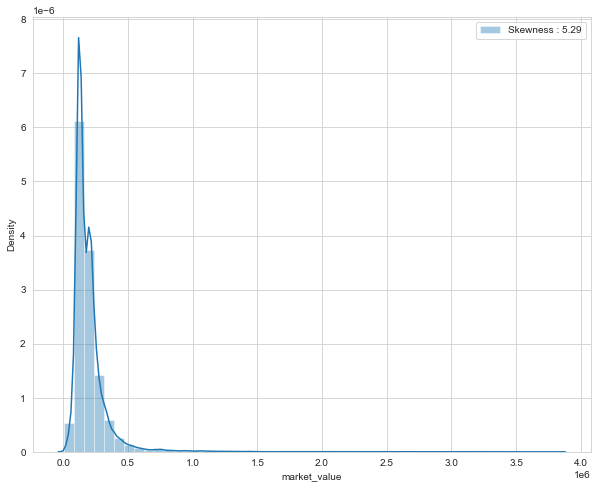

In [26]:
plt.figure(figsize = (10,8))
sns.distplot(df['market_value'],label = 'Skewness : %.2f'%(df['market_value'].skew()))
plt.legend()
plt.show()

The distribution of age is highly skewed with skewness score = 5.64. Also positive skew which means that the mode is smaller than the median or mean. In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it. Well, the price of the property is ranging because it is affected by the specification of the house. We will keep this outliers because it is acceptable.
**We are using the Spearman Correlation because the data is not normally distributed**.

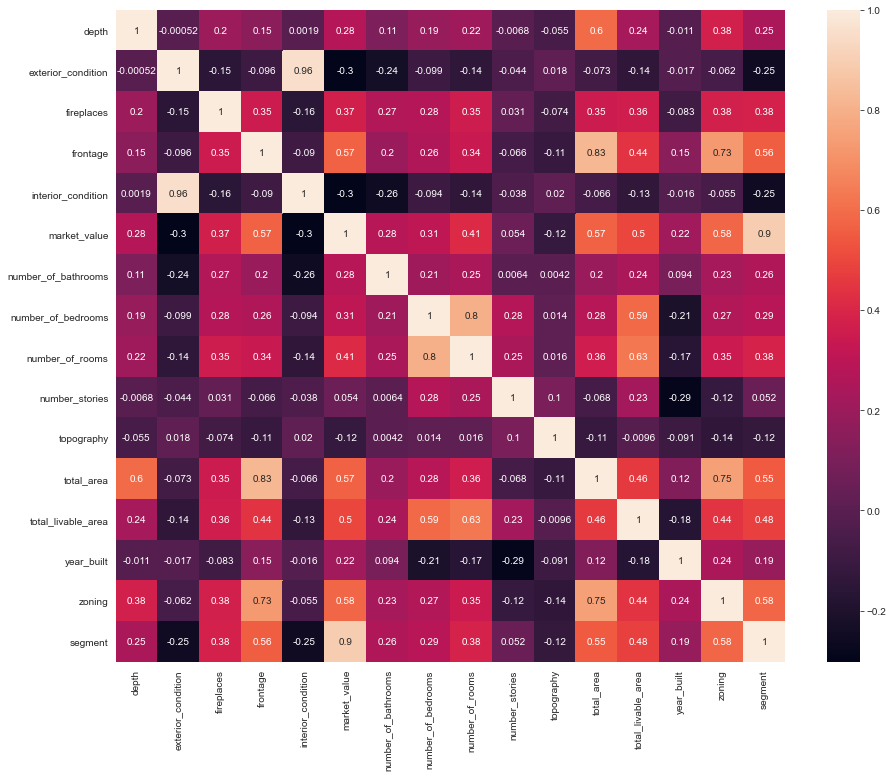

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

zoning, total_area, total_livable_area, taxable_building, taxable_land, frontage, fireplaces, number_of bedrooms, number_of_bathrooms, depths are positively corelated with the market_value of property. it means that the higher the number will result to higher price of the property.
Further analysis needs to be conducted to validate the correlation

# Exploratory Data Analysis - Regression

# Univariate

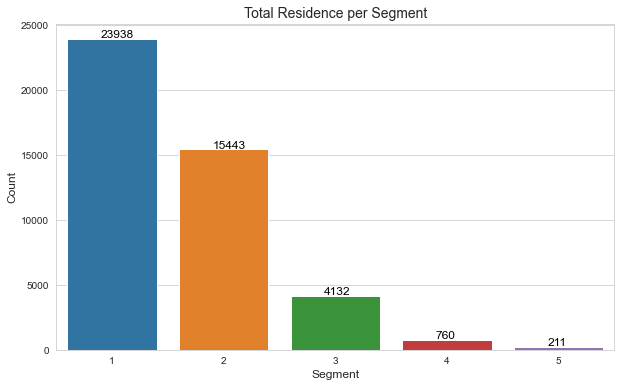

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(df['segment'])

a = -0.1
for i in pd.crosstab(index=df['segment'], columns='count')['count']:
    X = i
    plt.text(a,X+100,i, fontdict={'color' : 'black'}, size=12)
    a += 1
plt.xlabel('Segment', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence per Segment', size=14)
plt.show()

From this Countplot, we can see :
   - Segment 1 : 23925 Residence
   - Segment 2 : 15411 Residence
   - Segment 3 :  4178 Residence
   - Segment 4 :   778 Residence
   - Segment 5 :   212 Residence

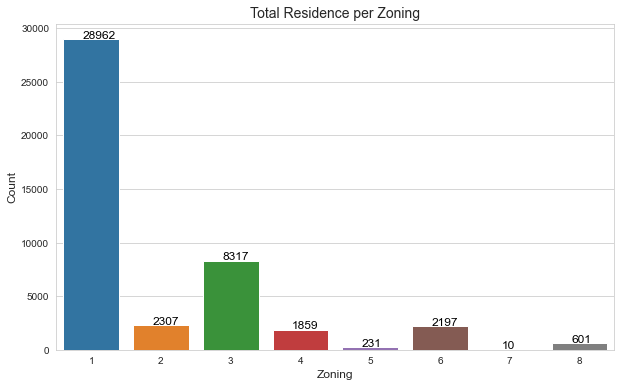

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df['zoning'])

a = -0.12
for i in pd.crosstab(index=df['zoning'], columns='count')['count']:
    X = i
    plt.text(a,X+100,i, fontdict={'color' : 'black'}, size=12)
    a += 1
plt.xlabel('Zoning', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence per Zoning', size=14)
plt.show()

From this Countplot, we can see :
   - Zoning 1 (RSA5) : 28969 Residence [Min Lot Area :  1440 sq ft, Min frontage : 16 ft, Min depth :  5 ft]
   - Zoning 2 (RSA4) :  2307 Residence [Min Lot Area :  1620 sq ft, Min frontage : 18 ft, Min depth :  8 ft]
   - Zoning 3 (RSA3) :  8321 Residence [Min Lot Area :  2250 sq ft, Min frontage : 25 ft, Min depth :  8 ft]
   - Zoning 4 (RSA2) :  1859 Residence [Min Lot Area :  3150 sq ft, Min frontage : 35 ft, Min depth :  8 ft]
   - Zoning 5 (RSA1) :   231 Residence [Min Lot Area :  5000 sq ft, Min frontage : 50 ft, Min depth : 10 ft] * Don't Have School, Hospital Facilities
   - Zoning 6 (RSD3) :  2199 Residence [Min Lot Area :  5000 sq ft, Min frontage : 50 ft, Min depth : 10 ft] * With School, Hospital Facilities
   - Zoning 7 (RSD2) :    10 Residence [Min Lot Area :  7800 sq ft, Min frontage : 65 ft, Min depth : 10 ft]
   - Zoning 8 (RSD1) :   608 Residence [Min Lot Area : 10000 sq ft, Min frontage : 75 ft, Min depth : 15 ft]

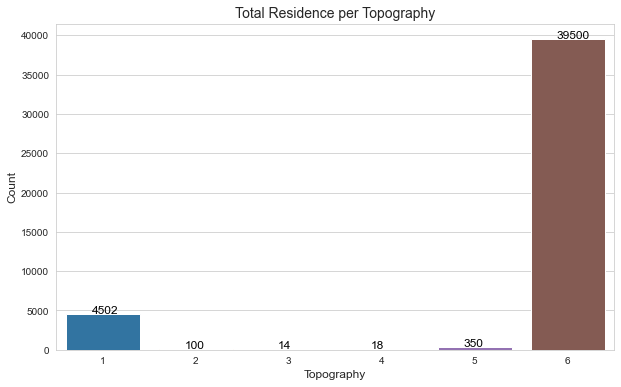

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(df['topography'])

a = -0.12
for i in pd.crosstab(index=df['topography'], columns='count')['count']:
    X = i
    plt.text(a,X+100,i, fontdict={'color' : 'black'}, size=12)
    a += 1
plt.xlabel('Topography', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence per Topography', size=14)
plt.show()

From this Countplot, we can see :
   - 1 - Above Street Level :  4502 Residence
   - 2 - Below Street Level :   100 Residence
   - 3 - Flood Plain        :    14 Residence
   - 4 - Rocky              :    18 Residence
   - 5 - Not Identified     :   350 Residence
   - 6 - Level              : 39500 Residence

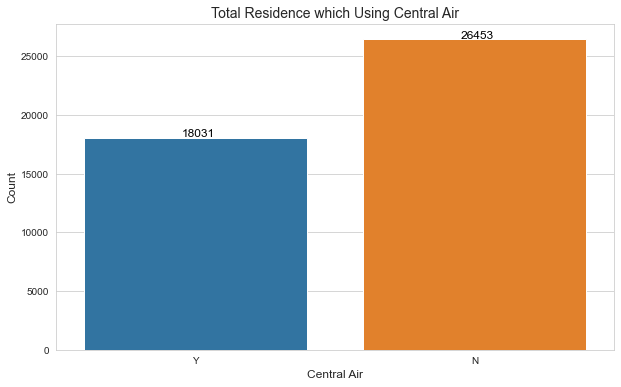

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(df['central_air'])

a = 0.95
for i in pd.crosstab(index=df['central_air'], columns='count')['count']:
    X = i
    plt.text(a,X+100,i, fontdict={'color' : 'black'}, size=12)
    a += -1
plt.xlabel('Central Air', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence which Using Central Air', size=14)
plt.show()

From this Countplot, we can see Total Residence which Using Central Air :
   - Y (Using) : 18031 Residence
   - N (Not Using) : 46453 Residence

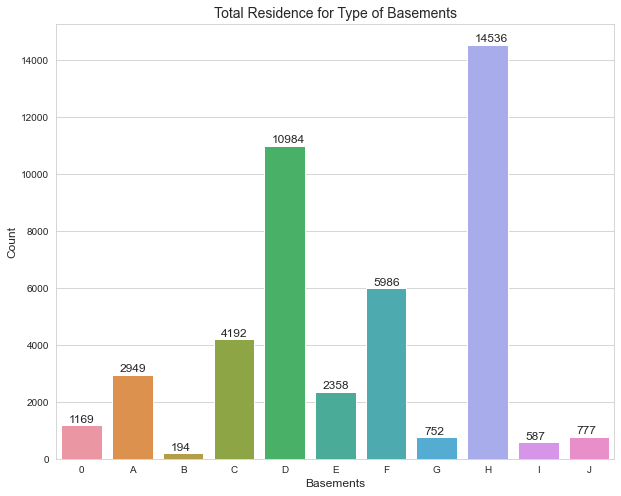

In [32]:
base = df[['basements', 'segment']].groupby('basements').count().reset_index()
base['count'] = base['segment']
base.drop(columns = 'segment', inplace = True)

plt.figure(figsize = (10,8))
sns.barplot(base['basements'], base['count'])
for index, value in enumerate(base['count']):
    plt.text(index-0.25, value+100, str(value), size=12)

plt.xlabel('Basements', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence for Type of Basements', size=14)
plt.show()

Type of Basements :
- 0 = None – Indicates no basement (1169 Residence)
- A = Full Finished (2949 Residence)
- B = Full Semi-Finished (194 Residence)
- C = Full Unfinished (4192 Residence)
- D = Full – Unknown Finish (10984 Residence)
- E = Partial Finished (2358 Residence)
- F = Partial Semi-Finished (5986 Residence)
- G = Partial Unfinished (752 Residence)
- H = Partial - Unknown Finish (14536 Residence)
- I = Unknown Size - Finished (587 Residence)
- J = Unknown Size - Unfinished (777 Residence)

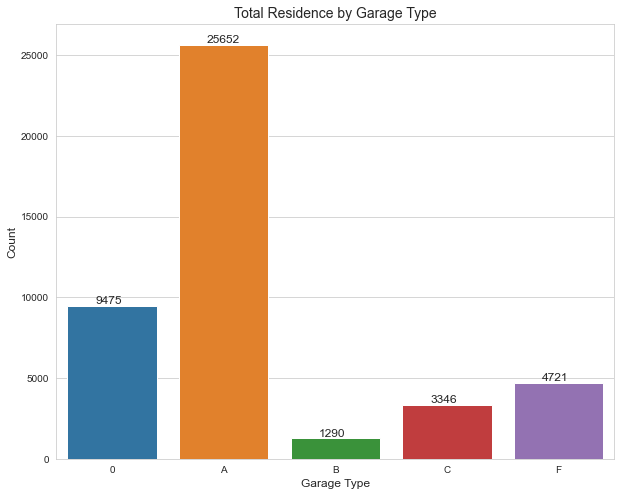

In [33]:
garage = df[['garage_type', 'segment']].groupby('garage_type').count().reset_index()
garage['count'] = garage['segment']
garage.drop(columns = 'segment', inplace = True)

plt.figure(figsize = (10,8))
sns.barplot(garage['garage_type'], garage['count'])
for index, value in enumerate(garage['count']):
    plt.text(index-0.15, value+100, str(value), size=12)

plt.xlabel('Garage Type', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Garage Type', size=14)
plt.show()

Type of Garage :
- 0 = None (9475 Residence)
- A = Basement / Built-In (25652 Residence)
- B = Attached Garage (1290 Residence)
- C = Detached Garage (3346 Residence)
- F = Converted (4721 Residence)

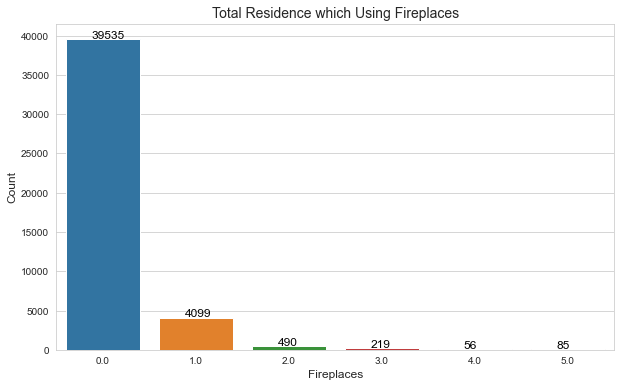

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(df['fireplaces'])

a = -0.12
for i in pd.crosstab(index=df['fireplaces'], columns='count')['count']:
    X = i
    plt.text(a,X+100,i, fontdict={'color' : 'black'}, size=12)
    a += 1
plt.xlabel('Fireplaces', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence which Using Fireplaces', size=14)
plt.show()

From this Countplot, we can see Total Residence which Using Fireplaces :
   - 0 (None) : 39535 Residence
   - 1 : 4099 Residence
   - 2 :  490 Residence
   - 3 :  219 Residence
   - 4 :   56 Residence
   - 5 :   85 Residence

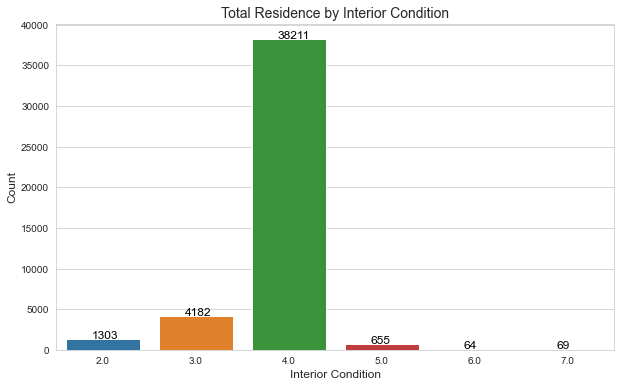

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(df['interior_condition'])

a = -0.12
for i in pd.crosstab(index=df['interior_condition'], columns='count')['count']:
    X = i
    plt.text(a,X+100,i, fontdict={'color' : 'black'}, size=12)
    a += 1
plt.xlabel('Interior Condition', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Interior Condition', size=14)
plt.show()

Type of Interior Condition:
   - 2 (New / Rehabbed) - 1303 Residence
   - 3 (Above Average) - 4182 Residence
   - 4 (Average) - 38211 Residence
   - 5 (Below Average) - 655 Residence
   - 6 (Vacant) - 64 Residence
   - 7 (Structurally Compromised) - 69 Residence

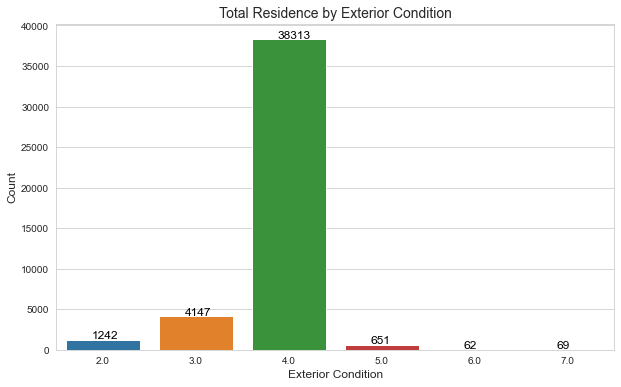

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df['exterior_condition'])

a = -0.12
for i in pd.crosstab(index=df['exterior_condition'], columns='count')['count']:
    X = i
    plt.text(a,X+100,i, fontdict={'color' : 'black'}, size=12)
    a += 1
plt.xlabel('Exterior Condition', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Exterior Condition', size=14)
plt.show()

Type of Interior Condition:
   - 2 (New / Rehabbed) - 1242 Residence
   - 3 (Above Average) - 4147 Residence
   - 4 (Average) - 38313 Residence
   - 5 (Below Average) - 651 Residence
   - 6 (Vacant) - 62 Residence
   - 7 (Structurally Compromised) - 69 Residence

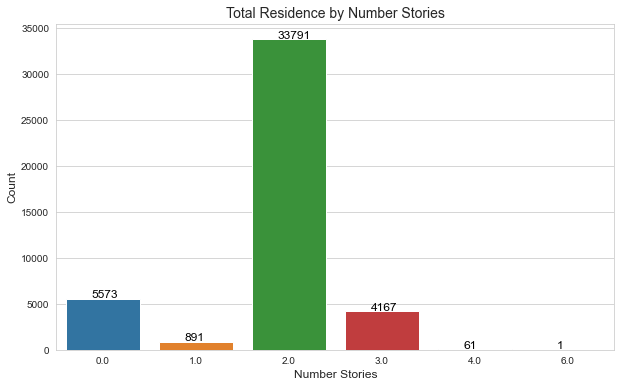

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(df['number_stories'])

a = -0.12
for i in pd.crosstab(index=df['number_stories'], columns='count')['count']:
    X = i
    plt.text(a,X+100,i, fontdict={'color' : 'black'}, size=12)
    a += 1
plt.xlabel('Number Stories', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Number Stories', size=14)
plt.show()

From this Countplot, we can see Total Residence per Number Stories :
   - 0 (None) : 5573 Residence
   - 1 : 891 Residence
   - 2 : 33791 Residence
   - 3 :  4167 Residence
   - 4 :    61 Residence
   - 6 :     1 Residence

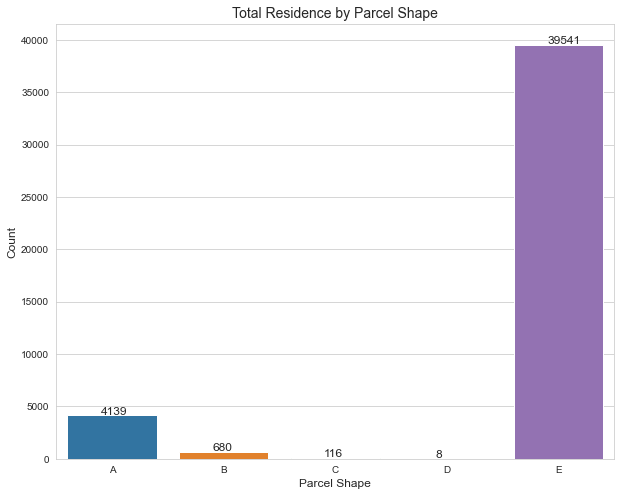

In [38]:
shape = df[['parcel_shape', 'segment']].groupby('parcel_shape').count().reset_index()
shape['count'] = shape['segment']
shape.drop(columns = 'segment', inplace = True)

plt.figure(figsize = (10,8))
sns.barplot(shape['parcel_shape'], shape['count'])
for index, value in enumerate(shape['count']):
    plt.text(index-0.1, value+100, str(value), size=12)

plt.xlabel('Parcel Shape', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Parcel Shape', size=14)
plt.show()

From this Barplot, we can see Total Residence by Parcel Shape :
   - A (Irregular) : 4139 Residence
   - B (Grossly Irregular) : 680 Residence
   - C (Triangular) : 116 Residence
   - D (Right of way) :  8 Residence
   - E (Rectangular) :    39541 Residence

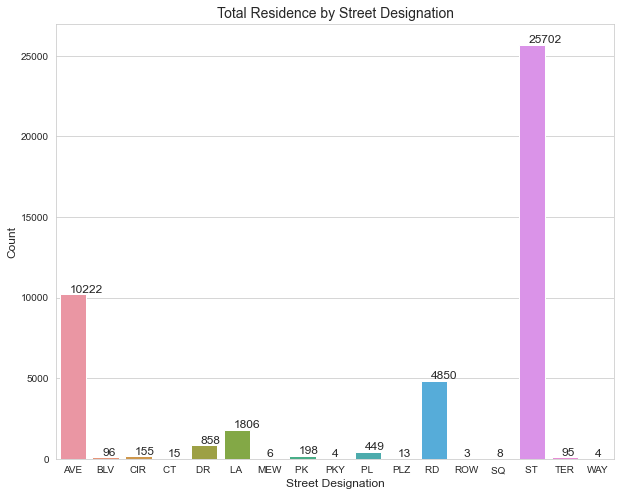

In [39]:
street = df[['street_designation', 'segment']].groupby('street_designation').count().reset_index()
street['count'] = street['segment']
street.drop(columns = 'segment', inplace = True)

plt.figure(figsize = (10,8))
sns.barplot(street['street_designation'], street['count'])
for index, value in enumerate(street['count']):
    plt.text(index-0.1, value+100, str(value), size=12)

plt.xlabel('Street Designation', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Street Designation', size=14)
plt.show()

Street Designation
- AVE - Avenue (10222 Residence)
- BLV - Boulevard (96 Residence)
- CIR - Circle (155 Residence)
- CT  - Court (15 Residence)
- DR  - Drive (858 Residence)
- LA  - Lane (1806 Residence)
- MEW - Mews (6 Residence)
- PK  - Park (198 Residence)
- PKY - Parkway (4 Residence)
- PL  - Place (449 Residence)
- PLZ - Plaza (13 Residence)
- RD  - Road (4850 Residence)
- ROW - Roadway (3 Residence)
- SQ  - Square (8 Residence)
- ST  - Street (25702 Residence)
- TER - Terrace (95 Residence)
- WAY - Way (4 Residence)

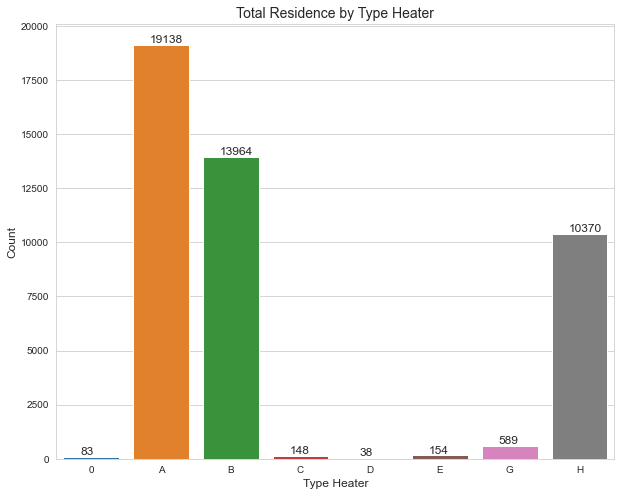

In [40]:
heater = df[['type_heater', 'segment']].groupby('type_heater').count().reset_index()
heater['count'] = heater['segment']
heater.drop(columns = 'segment', inplace = True)

plt.figure(figsize = (10,8))
sns.barplot(heater['type_heater'], heater['count'])
for index, value in enumerate(heater['count']):
    plt.text(index-0.155, value+100, str(value), size=12)

plt.xlabel('Type Heater', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Type Heater', size=14)
plt.show()

Type of heater or heating system:
- 0 = None - 83 Residence
- a = Hot air (ducts) - 19138 Residence
- b = Hot water (radiators or baseboards) - 13964 Residence
- c = Electric baseboard - 148 Residence
- d = Heat pump (outside unit) - 38 Residence
- e = Other - 154 Residence
- g = Radiant - 589 Residence
- h = Undetermined - 10370 Residence

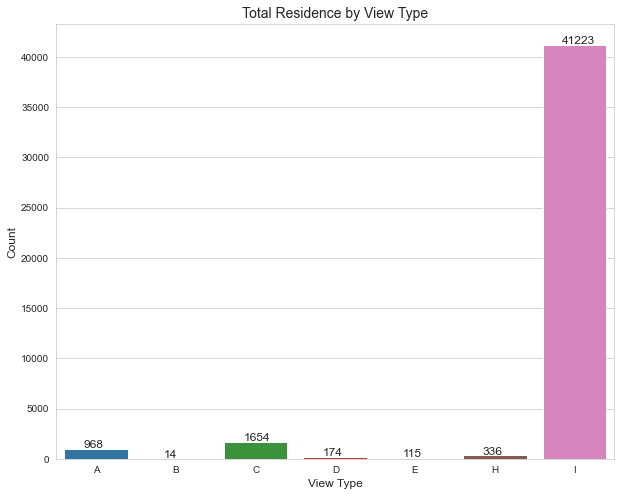

In [41]:
viewtype = df[['view_type', 'segment']].groupby('view_type').count().reset_index()
viewtype['count'] = viewtype['segment']
viewtype.drop(columns = 'segment', inplace = True)

plt.figure(figsize = (10,8))
sns.barplot(viewtype['view_type'], viewtype['count'])
for index, value in enumerate(viewtype['count']):
    plt.text(index-0.155, value+100, str(value), size=12)

plt.xlabel('View Type', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by View Type', size=14)
plt.show()

View Type:
- A = Cityscape / Skyline - 968 Residence
- B = Flowing Water - 14 Residence
- C = Park/Green Area - 1654 Residence
- D = Commercial - 174 Residence
- E = Industrial - 115 Residence
- H = Edifice / Landmark - 336 Residence
- I = Typical / Other - 41223 Residence

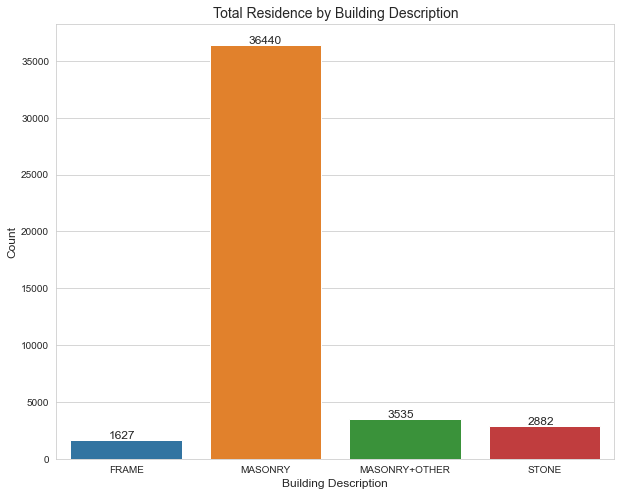

In [42]:
buildingdescription = df[['building_description', 'segment']].groupby('building_description').count().reset_index()
buildingdescription['count'] = buildingdescription['segment']
buildingdescription.drop(columns = 'segment', inplace = True)

plt.figure(figsize = (10,8))
sns.barplot(buildingdescription['building_description'], buildingdescription['count'])
for index, value in enumerate(buildingdescription['count']):
    plt.text(index-0.125, value+100, str(value), size=12)

plt.xlabel('Building Description', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Building Description', size=14)
plt.show()

Building Description:
- FRAME : Steel - 1627 Residence
- MASONRY : Bricks and Concrete - 36440 Residence
- MASONRY+OTHER : Bricks and Concrete Combine with Steel - 3535 Residence
- STONE : Purely Stone - 2882 Residence

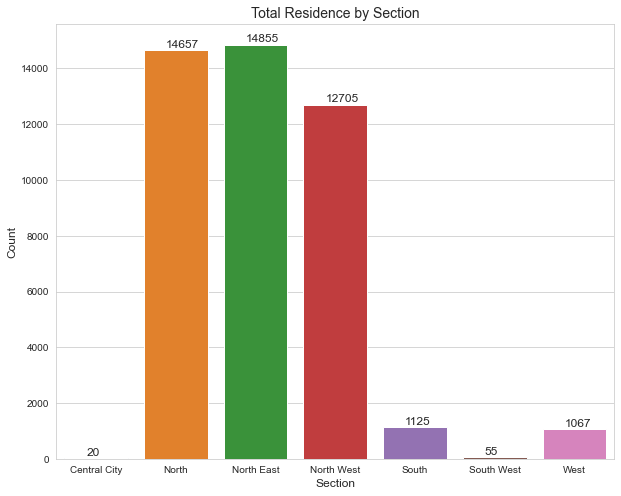

In [43]:
sections = df[['section', 'segment']].groupby('section').count().reset_index()
sections['count'] = sections['segment']
sections.drop(columns = 'segment', inplace = True)

plt.figure(figsize = (10,8))
sns.barplot(sections['section'], sections['count'])
for index, value in enumerate(sections['count']):
    plt.text(index-0.125, value+100, str(value), size=12)

plt.xlabel('Section', size=12)
plt.ylabel('Count', size=12)
plt.title('Total Residence by Section', size=14)
plt.show()

Section:
- Central City : 20 Residence
- North : 14657 Residence
- North East : 14855 Residence
- North West : 12705 Residence
- South : 1125 Residence
- South West : 55 Residence
- West : 1067 Residence

# Multivariate

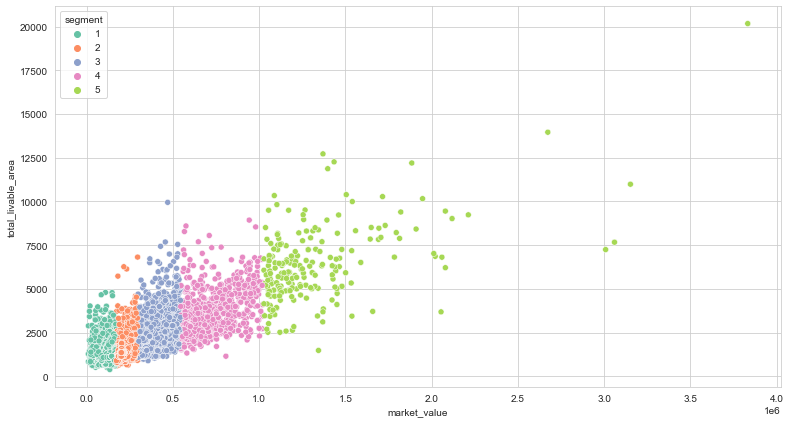

In [44]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'total_livable_area', data=df, hue = 'segment', palette = 'Set2' )
plt.show()

There is a segmented distribution based on market_value and total_livable_area.

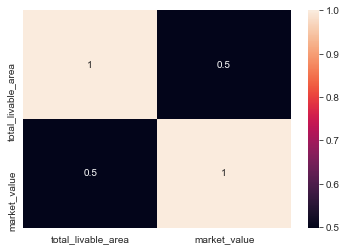

In [45]:
sns.heatmap(df[['total_livable_area', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the scatterplot and heatmap there is linear relationship between total livable area and market value, the correlation is 0.5 (moderate - strong positive correlation). This means that total livable area is affecting the price of the property. It is common because more livable area will required more resources to built.

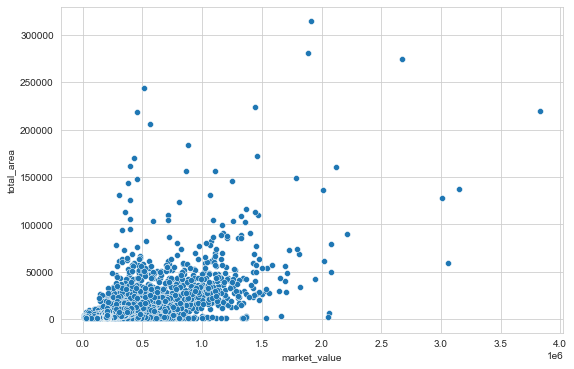

In [46]:
plt.figure(figsize= (9,6))
sns.scatterplot(df['market_value'], df['total_area'])
plt.show()

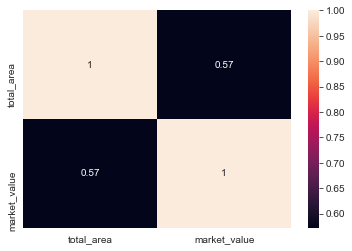

In [47]:
sns.heatmap(df[['total_area', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the scatterplot and heatmap there is linear relationship between total area and market value, the correlation is 0.57 (moderate - strong positive correlation). This means that total area is affecting the price of the property. It is common because more area will increase the price.

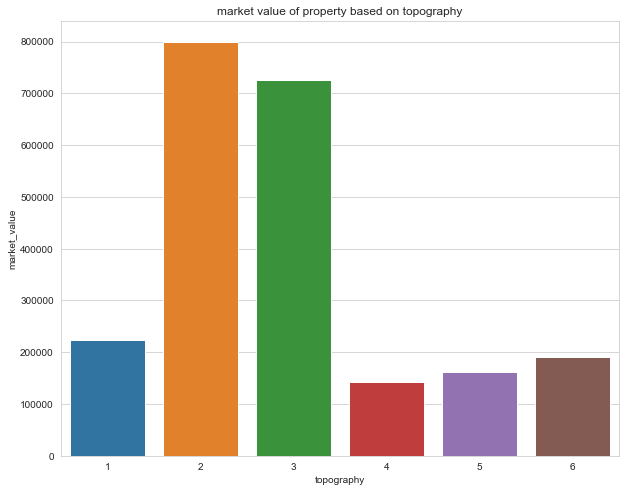

In [48]:
topo = df[['topography', 'market_value']].groupby('topography').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(topo['topography'], topo['market_value'])
plt.title('market value of property based on topography')
plt.show()

Classification of topography:
   - 1 -> Above
   - 2 -> Below Street Level
   - 3 -> Flood Plain or Flood Hazard Zone
   - 4 -> Rocky 
   - 5 -> Not Identified
   - 6 -> Level
    
Surprisingly property that was built on below street level and flood plain are **more expensive** than the rest in this data. Below street level property could face a drainage problem, flood plain area are identified as flood hazard zone. **Usually people avoid this kind of area because it has higher possibility in exposed to flood resulting in lower demand (lower price)**.

In [49]:
topo2 = df[['topography', 'market_value']].groupby('topography').count().reset_index()
topo2['percentage'] = topo2['market_value']/topo2['market_value'].sum()*100

In [50]:
topo2

,topography,market_value,percentage
0,1,4502,10.120493
1,2,100,0.224800
2,3,14,0.031472
3,4,18,0.040464
4,5,350,0.786800
5,6,39500,88.795972


Based on the data, the property that was built on below street level and flood plain is only 0.28% from the total data so the data could not be used as the representative of the data. Above street level property has the highest mean market value (if we took out flood plain and below street level).

In [51]:
correlation_ratio(df['topography'], df['market_value'])

0.2338064883588518

Based on the correlation ratio there is a low correlation between topography and market value. This means that topography is affecting the price of the property.

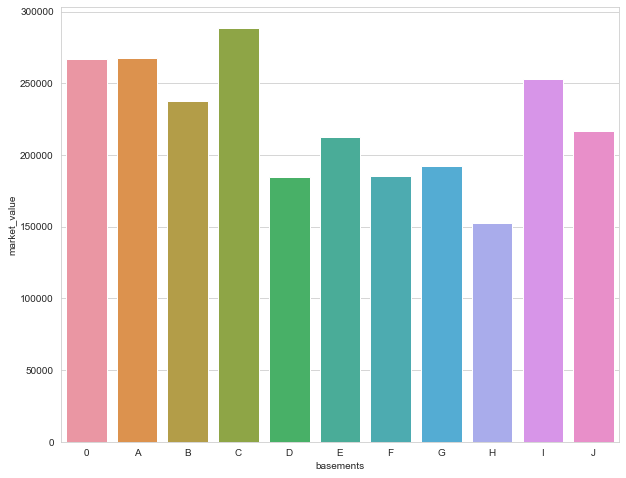

In [52]:
base = df[['basements', 'market_value']].groupby('basements').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(base['basements'], base['market_value'])
plt.show()

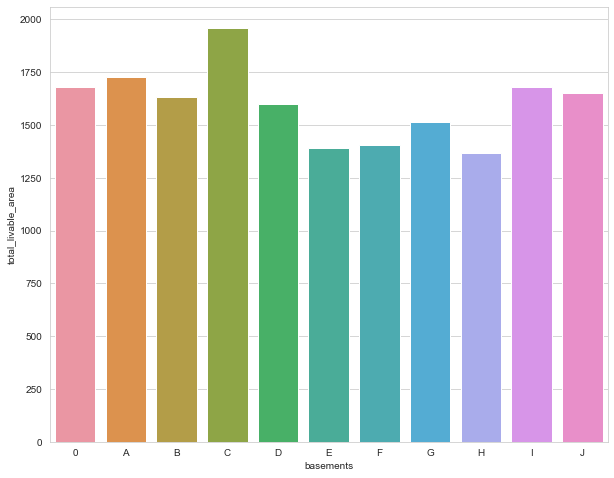

In [53]:
base_area = df[['basements', 'total_livable_area']].groupby('basements').mean().reset_index()
plt.figure(figsize= (10,8))
sns.barplot(base_area['basements'], base_area['total_livable_area'])
plt.show()

Basements :
- 0 = None – Indicates no basement.
- A = Full Finished – Occupies the entire area under the first floor.
- B = Full Semi-Finished – Could have some finish to include a floor covering,
  and ceiling. It looks more like a living area rather than a basement.
- C = Full Unfinished – Is a typical basement with unfinished concrete floor,
  either rubble stone or cement over stone or concrete walls and would have
  exposed wood joist ceilings.
- D = Full – Unknown Finish
- E = Partial Finished – Occupies a portion under the first floor. Be careful of
  areas under sheds and porches. If there is a garage at basement level then it is a
  partial basement.
- F = Partial Semi-Finished – One or more finished areas.
- G = Partial Unfinished
- H = Partial - Unknown Finish
- I = Unknown Size - Finished
- J = Unknown Size - Unfinished

The Property which doesn't have a basements, it doesn't mean cheaper than any property which have a basement. Basement type H (partial, unfinished basement) is the lowest based on market value, because it has the smallest total livable area.

In [54]:
correlation_ratio(df['basements'], df['market_value'])

0.32893065197317944

Based on the correlation ratio there is a low correlation between basements and market value. This means that basements is affecting the price of the property.

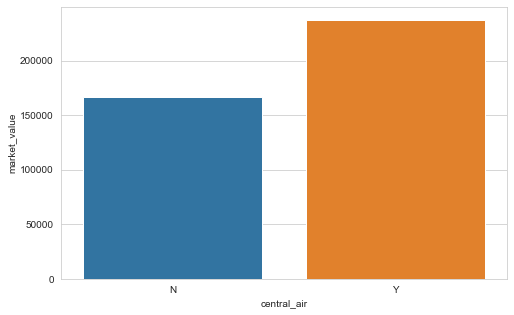

In [55]:
central = df[['central_air', 'market_value']].groupby('central_air').mean().reset_index()
plt.figure(figsize= (8,5))
sns.barplot(central['central_air'], central['market_value'])
plt.show()

Property using the central air has higher market value than property without the central air.

In [56]:
correlation_ratio(df['central_air'], df['market_value'])

0.2544928457112928

Based on the correlation ratio there is a low correlation between central air and market value. This means that central air is affecting the price of the property.

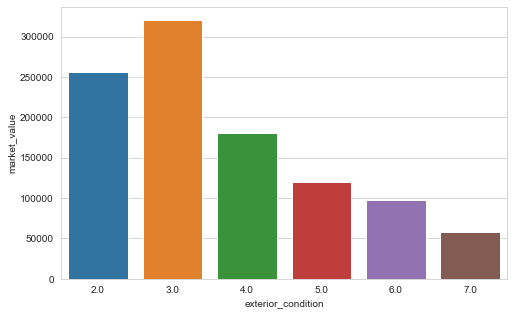

In [57]:
ext_condition = df[['exterior_condition', 'market_value']].groupby('exterior_condition').mean().reset_index()
plt.figure(figsize= (8,5))
sns.barplot(ext_condition['exterior_condition'], ext_condition['market_value'])
plt.show()

Exterior Condition :
   -  2. New / Rehabbed – Noticeably new construction
   -  3. Above Average 
   -  4. Average – would be typical.
   -  5. Below Average
   -  6. Vacant – No occupancy.
   -  7. Sealed / Structurally Compromised

From this barplot, as we can see **Above Average for Exterior Condition** is the highest mean price for the property. Surprisingly The New / Rehabbed Exterior Condition mean price is below the Above Average.

In [58]:
correlation_ratio(df['exterior_condition'], df['market_value'])

0.3156858799708893

Based on the correlation ratio there is a low correlation between exterior condition and market value. This means that exterior condition is affecting the price of the property.

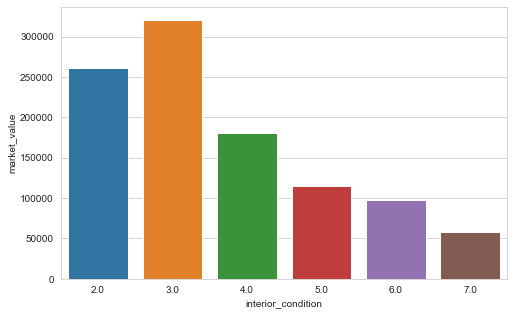

In [59]:
int_condition = df[['interior_condition', 'market_value']].groupby('interior_condition').mean().reset_index()
plt.figure(figsize= (8,5))
sns.barplot(int_condition['interior_condition'], int_condition['market_value'])
plt.show()

Interior Condition :
   -  2. New / Rehabbed – Noticeably new construction
   -  3. Above Average 
   -  4. Average – would be typical.
   -  5. Below Average
   -  6. Vacant – No occupancy.
   -  7. Sealed / Structurally Compromised

From this barplot, as we can see **Above Average for Interior Condition** is the highest mean price for the property. Surprisingly The New / Rehabbed Interior Condition mean price is below the Above Average.

In [60]:
correlation_ratio(df['interior_condition'], df['market_value'])

0.3202360021996964

Based on the correlation ratio there is a low correlation between interior condition and market value. This means that interior condition is affecting the price of the property.

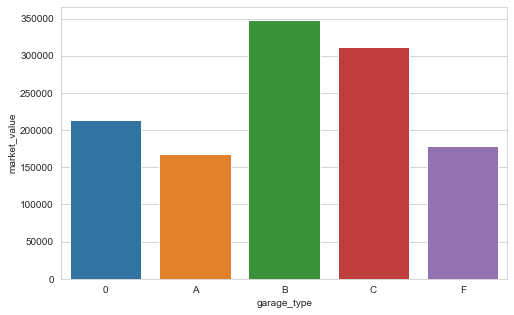

In [61]:
garage = df[['garage_type', 'market_value']].groupby('garage_type').mean().reset_index()
plt.figure(figsize= (8,5))
sns.barplot(garage['garage_type'], garage['market_value'])
plt.show()

Garage Type :
   - 0 = None
   - A = Basement / Built-In - Built into the front or rear basement of the dwelling or built into
     the first floor of the dwelling.
   - B = Attached Garage - Connected to the dwelling.
   - C = Detached Garage - A separate building that is not attached to the dwelling or any other
     building.
   - F = Converted

From this barplot, as we can see **Attached Garage** is the highest mean price for the property. But the mean price of **Detached Garage** is not far apart than Attached Garage. And the lowest mean price for the property is for **Basement / Built-In Garage**.

In [62]:
correlation_ratio(df['garage_type'], df['market_value'])

0.3433669206546411

Based on the correlation ratio there is a low correlation between garage type and market value. This means that garage type is affecting the price of the property.

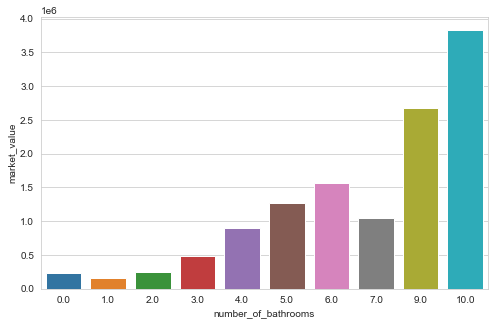

In [63]:
bathrooms = df[['number_of_bathrooms', 'market_value']].groupby('number_of_bathrooms').mean().reset_index()
plt.figure(figsize= (8,5))
sns.barplot(bathrooms['number_of_bathrooms'], bathrooms['market_value'])
plt.show()

Surprisingly though from this barplot, property with 7 bathrooms has lower price compared with the others.

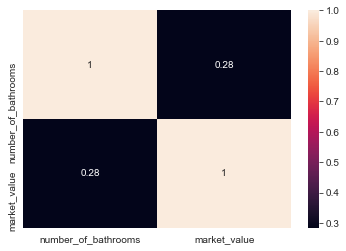

In [64]:
sns.heatmap(df[['number_of_bathrooms', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the heatmap there is a linear relationship between number of bathrooms and market value. The correlation is 0.28 (low - moderate positive correlation). This means that number of bathrooms is affecting the price of the property.

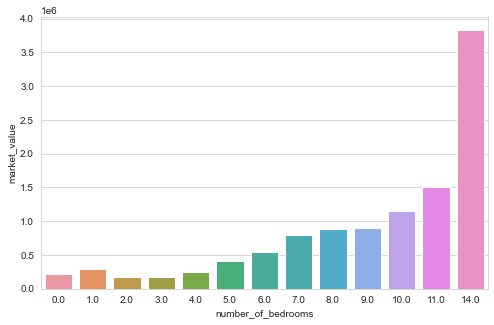

In [65]:
bedrooms = df[['number_of_bedrooms', 'market_value']].groupby('number_of_bedrooms').mean().reset_index()
plt.figure(figsize= (8,5))
sns.barplot(bedrooms['number_of_bedrooms'], bedrooms['market_value'])
plt.show()

Surprisingly though from this barplot, there is a up trend for number of bedrooms and its align with the market value.
For number of bedrooms 14 it is a antique property with a good condition.

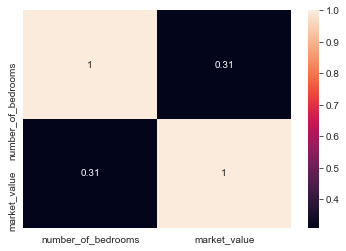

In [66]:
sns.heatmap(df[['number_of_bedrooms', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the heatmap there is a linear relationship between number of bedrooms and market value. The correlation is 0.31 (low - moderate positive correlation). This means that number of bedrooms is affecting the price of the property.

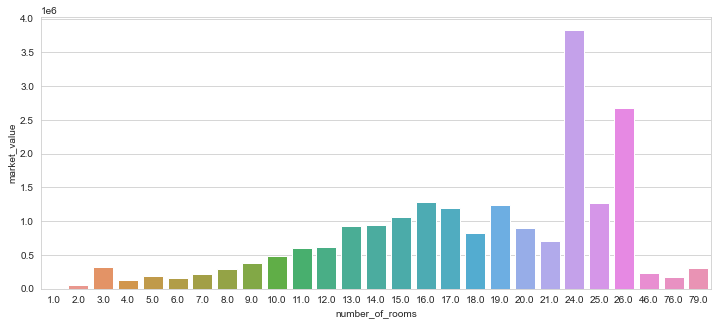

In [67]:
rooms = df[['number_of_rooms', 'market_value']].groupby('number_of_rooms').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(rooms['number_of_rooms'], rooms['market_value'])
plt.show()

In [68]:
df[df['number_of_rooms'] >= 24].sort_values('number_of_rooms', ascending=True)

,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section,segment
2078,A,DET W/B GAR 2 STY STONE,Y,504.12,3.0,5.0,375.00,A,3.0,9002 CREFELD ST,3832800.0,10.0,14.0,24.0,2.0,A,ST,6,219542.00,20172.0,E,C,1929.0,8,STONE,North West,5
1353,C,DET W/D GAR 2.5 STY STONE,Y,235.81,4.0,5.0,255.00,C,4.0,701 W ALLENS LN,1102200.0,5.0,8.0,25.0,0.0,B,LA,6,60154.00,9824.0,A,I,1920.0,8,STONE,North West,5
2334,A,DET 3 STY MASONRY+OTHER,Y,246.15,3.0,5.0,227.50,0,3.0,8862 TOWANDA AVE,1453000.0,5.0,7.0,25.0,3.0,E,AVE,2,50355.36,8184.0,A,C,1849.0,8,MASONRY+OTHER,North West,5
2332,D,DET W/D GAR 3 STY STONE,N,450.50,3.0,5.0,841.00,C,3.0,8811 TOWANDA AVE,2673300.0,9.0,10.0,26.0,0.0,E,AVE,1,274428.00,13960.0,G,C,1894.0,8,STONE,North West,5
13483,D,ROW 2.5 STY FRAME,Y,142.06,4.0,0.0,16.05,0,4.0,250 LAURISTON ST,230800.0,2.0,3.0,46.0,3.0,E,ST,6,2280.06,1680.0,A,I,2000.0,1,FRAME,North West,2
15766,H,S/D W/B GAR 2 STY MASONRY,N,106.00,4.0,0.0,26.25,A,4.0,230 E SEDGWICK ST,174400.0,2.0,3.0,76.0,2.0,E,ST,6,2782.50,1600.0,B,I,1950.0,3,MASONRY,North West,2
13640,C,DET 2.5 STY STONE,N,74.46,4.0,0.0,145.92,0,4.0,481 PAOLI AVE,308400.0,2.0,5.0,79.0,3.0,A,AVE,6,9869.00,2820.0,B,C,1950.0,4,STONE,North West,3


Total rooms 24, 25, 26 is a top segment for all this entire property, 24 & 26 is an antique property with a good condition and huge total area, on 25 is an antique property too but have a weakness on type heater and smaller total area.

For rooms 46, 76, 79 is an outliers data, nothing special, it just a plenty of number rooms.

In [69]:
df[(df['number_of_rooms'] == 17) | (df['number_of_rooms'] == 18)].sort_values('number_of_rooms', ascending=True)

,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section,segment
447,C,ROW 3 STY MASONRY,Y,108.00,3.0,0.0,18.00,0,3.0,2111 DELANCEY PL,2054100.0,4.0,4.0,17.0,3.0,E,PL,1,1944.00,3688.0,A,I,1850.0,1,MASONRY,Central City,5
584,C,DET W/B GAR 2.5 STY STONE,Y,192.33,4.0,5.0,105.54,B,4.0,8840 NORWOOD AVE,898400.0,5.0,6.0,17.0,0.0,E,AVE,1,20299.00,5325.0,A,C,1861.0,6,STONE,North West,4
1266,D,DET W/D GAR 2.5 STY STONE,N,215.44,4.0,3.0,176.90,C,3.0,320 W MERMAID LN,977300.0,3.0,5.0,17.0,3.0,B,LA,6,32427.00,4015.0,A,I,1922.0,8,STONE,North West,4
1446,A,DET W/D GAR 2.5 STY STONE,Y,197.00,3.0,3.0,250.00,C,3.0,435 W MORELAND AVE,1714900.0,6.0,6.0,17.0,0.0,E,AVE,6,49250.00,10279.0,A,C,1920.0,8,STONE,North West,5
2200,C,DET W/D GAR 2.5 STY STONE,Y,177.09,4.0,3.0,200.00,C,4.0,7303 EMLEN ST,1036300.0,4.0,6.0,17.0,3.0,E,ST,6,29397.00,8508.0,A,C,1925.0,8,STONE,North West,5
2285,D,DET W/D GAR 3 STY STONE,N,288.60,3.0,5.0,117.37,C,3.0,8203 ST MARTINS LN,1820500.0,6.0,7.0,17.0,3.0,E,LA,1,33664.00,9398.0,B,C,1912.0,8,STONE,North West,5
12306,A,DET W/B GAR 2.5 STY STONE,Y,459.25,4.0,5.0,232.17,A,4.0,3031 W SCHOOL HOUSE LN,1369400.0,5.0,6.0,17.0,3.0,B,LA,6,116220.00,12722.0,A,C,1940.0,6,STONE,North West,5
16285,D,DET W/D GAR 2.5 STY STONE,N,189.50,3.0,1.0,75.00,C,3.0,321 CARPENTER LN,663400.0,3.0,7.0,17.0,0.0,E,LA,6,14212.50,5045.0,B,I,1925.0,6,STONE,North West,4
17451,D,ROW 3 STY MASONRY,N,98.25,4.0,0.0,18.00,0,4.0,2007 E YORK ST,221000.0,5.0,2.0,17.0,3.0,E,ST,6,1768.50,2332.0,B,I,1875.0,1,MASONRY,North East,2
736,C,DET W/D GAR 2.5 STY STONE,Y,120.20,3.0,3.0,256.11,C,3.0,150 BETHLEHEM PIKE,1125900.0,3.0,6.0,18.0,3.0,E,PK,6,30784.42,5163.0,G,I,1830.0,8,STONE,North West,5


Different from number of rooms 17 & 18 is condition interior and exterior, majority for number of rooms 18 is average condition, and total living area number of rooms 18 smaller than number 17.

In [70]:
df[(df['number_of_rooms'] == 19) | (df['number_of_rooms'] == 20) | (df['number_of_rooms'] == 21)].sort_values('number_of_rooms', ascending=True)

,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section,segment
155,D,DET W/GAR 3 STY MASONRY,Y,94.33,3.0,0.0,73.37,A,3.0,119 CATHARINE ST,2059200.0,6.0,7.0,19.0,3.0,E,ST,6,6920.99,6814.0,A,I,2006.0,1,MASONRY,South,5
735,C,DET 2.5 STY STONE,Y,186.00,3.0,5.0,110.38,0,3.0,142 BETHLEHEM PIKE,1054500.0,3.0,7.0,19.0,3.0,B,PK,6,22320.00,6600.0,A,I,1883.0,8,STONE,North West,5
1158,G,DET W/B GAR 1 STY MASONRY,Y,249.46,4.0,1.0,271.84,A,4.0,626 ST GEORGES RD,791100.0,5.0,6.0,19.0,1.0,E,RD,1,67813.20,3695.0,A,C,1960.0,8,MASONRY,North West,4
2218,C,DET 2.5 STY STONE,Y,305.17,3.0,5.0,122.00,0,3.0,8525 SEMINOLE AVE,1063600.0,3.0,6.0,19.0,0.0,E,AVE,6,27450.00,5590.0,A,C,1885.0,6,STONE,North West,5
575,D,DET W/D GAR 3 STY MAS+OTH,Y,247.50,3.0,2.0,125.00,C,3.0,32 SUMMIT ST,1044600.0,7.0,9.0,20.0,0.0,E,ST,6,30937.50,7839.0,B,C,1925.0,8,MASONRY+OTHER,North West,5
15477,J,DET W/GAR 2.5 STY STONE,N,249.19,3.0,3.0,240.00,C,3.0,328 PELHAM RD,1504300.0,3.0,11.0,20.0,3.0,A,RD,6,53662.00,10392.0,B,I,1925.0,6,STONE,North West,5
15910,A,DET W/D GAR 2.5 STY STONE,Y,303.62,4.0,3.0,163.00,C,4.0,614 E SEDGWICK ST,585800.0,4.0,7.0,20.0,3.0,E,ST,6,49490.00,6053.0,B,I,1925.0,6,STONE,North West,4
16694,C,DET W/D GAR 2.5 STY STONE,N,201.55,5.0,5.0,166.32,C,5.0,30 PELHAM RD,468900.0,4.0,10.0,20.0,0.0,A,RD,6,51750.00,9950.0,B,I,1903.0,6,STONE,North West,3
13451,G,DET W/D GAR 3 STY STONE,Y,335.00,2.0,2.0,147.16,C,2.0,8520R HAGYS MILL RD,709800.0,5.0,5.0,21.0,3.0,A,RD,6,55361.32,8055.0,A,C,2002.0,8,STONE,North West,4


Different from number of rooms 19 & 20 is on interior and exterior condition, on number of rooms 20 had an interior and exterior condition below average, so this case made lower the price. For number of rooms 21 have a good condition, but have a fair price.

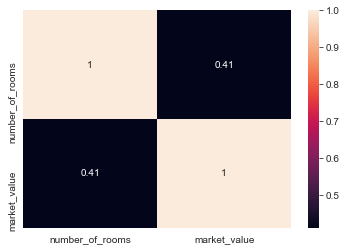

In [71]:
sns.heatmap(df[['number_of_rooms', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the heatmap there is a linear relationship between number of rooms and market value. The correlation is 0.41 (moderate positive correlation). This means that number of rooms is affecting the price of the property.

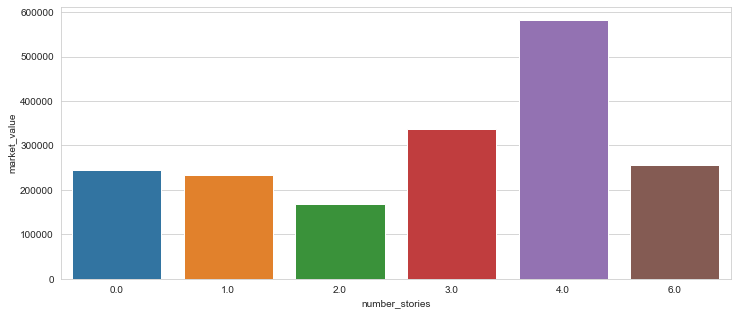

In [72]:
stories = df[['number_stories', 'market_value']].groupby('number_stories').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(stories['number_stories'], stories['market_value'])
plt.show()

As we can see from this barplot, the highest mean price for the property is 4 stories.

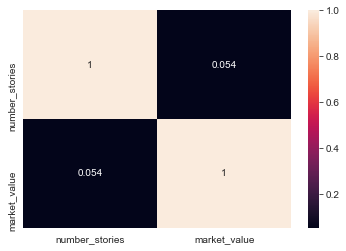

In [73]:
sns.heatmap(df[['number_stories', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the heatmap there is a low positive correlation relationship between number stories and market value. The correlation is 0.055 (low positive correlation). As we know from domain knowledge, number stories have a big impact for the price of property.

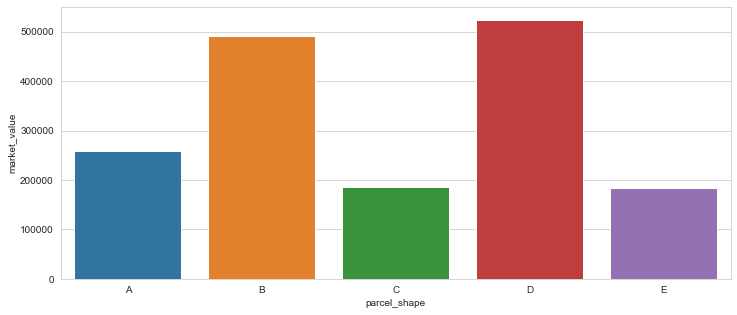

In [74]:
shape = df[['parcel_shape', 'market_value']].groupby('parcel_shape').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(shape['parcel_shape'], shape['market_value'])
plt.show()

Land Shape :
   - a. Irregular - This would be a lot other than a square, rectangular or a triangle. It is not a
        grossly irregular shape.
   - b. Grossly Irregular - This relates to a shape that may include curves, narrow portions, long
        access driveways or shapes where there are possibly portions of the site that cannot be
        utilized because of the physical shape.
   - c. Triangular - This is a parcel of land that is triangular in shape.
   - d. Right of way - A long narrow parcel of land.
   - e. Rectangular
   
As we can see from this barplot, the highest mean price for the property that have a **Uncommon land shape**.

In [75]:
correlation_ratio(df['parcel_shape'], df['market_value'])

0.3135519442354495

Based on the correlation ratio there is a low correlation between parcel shape and market value. The correlation is 0.319. This means that parcel shape is affecting the price of the property.

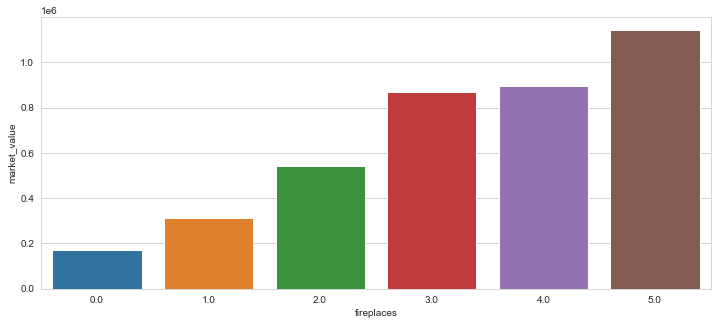

In [76]:
fireplaces = df[['fireplaces', 'market_value']].groupby('fireplaces').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(fireplaces['fireplaces'], fireplaces['market_value'])
plt.show()

As we can see from this barplot, more of fireplaces is more expensive for the property price.

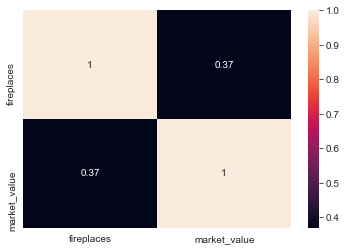

In [77]:
sns.heatmap(df[['fireplaces', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the heatmap there is a linear relationship between fireplaces and market value. The correlation is 0.37 (low - moderate positive correlation). This means that fireplaces is affecting the price of the property.

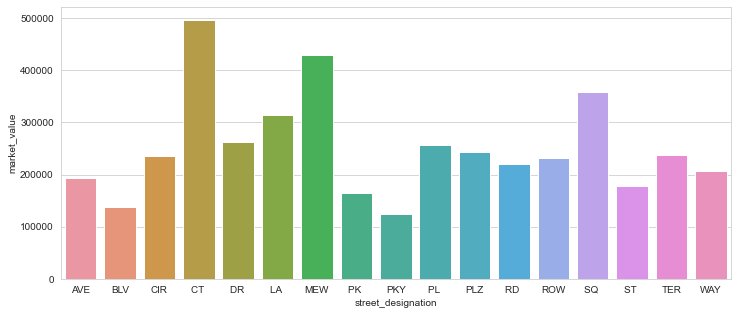

In [78]:
design = df[['street_designation', 'market_value']].groupby('street_designation').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(design['street_designation'], design['market_value'])
plt.show()

Street Designation
- AVE - Avenue
- BLV - Boulevard
- CIR - Circle
- CT  - Court
- DR  - Drive
- LA  - Lane 
- MEW - Mews
- PK  - Park
- PKY - Parkway 
- PL  - Place
- PLZ - Plaza
- RD  - Road
- ROW - Roadway
- SQ  - Square
- ST  - Street
- TER - Terrace
- WAY - Way

As we can see from the barplot, street designation CT (Court) is the highest price, because the type of CT street designation have a better access and street designation PKY (Parkway) is the lowest price, because the type of PKY street designation is only for small vehicle.

In [79]:
correlation_ratio(df['street_designation'], df['market_value'])

0.23099594170348292

Based on the correlation ratio there is a low correlation between street designation and market value. This means that street designation is low affecting the price of the property.

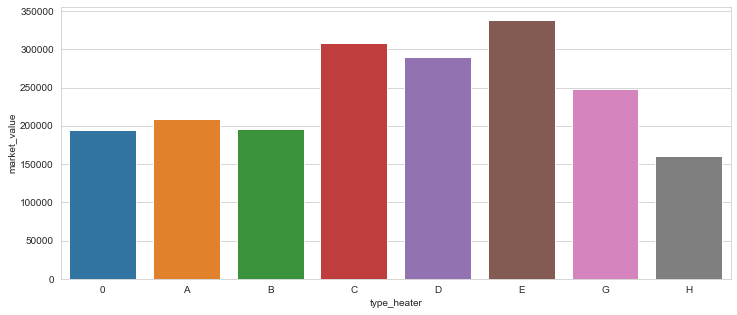

In [80]:
heater = df[['type_heater', 'market_value']].groupby('type_heater').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(heater['type_heater'], heater['market_value'])
plt.show()

Type of heater or heating system.
- a. Hot air (ducts)
- b. Hot water (radiators or baseboards)
- c. Electric baseboard
- d. Heat pump (outside unit).
- e. Other (Portable heater).
- g. Radiant
- h. Undetermined

As we can see from this barplot, type heater C, D, E is the highest price, and H is the lowest price because the type of heater is undetermined.

In [81]:
correlation_ratio(df['type_heater'], df['market_value'])

0.16563726278285787

Based on the correlation ratio there is a low correlation between type heater and market value. This means that type heater is low affecting the price of the property.

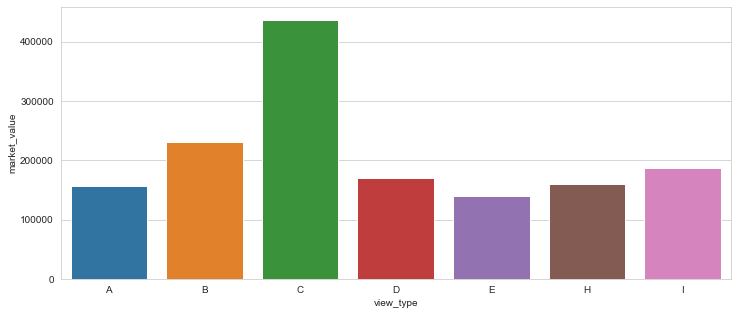

In [82]:
view = df[['view_type', 'market_value']].groupby('view_type').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(view['view_type'], view['market_value'])
plt.show()

View type
- A. Cityscape / Skyline
- B. Flowing Water
- C. Park/Green Area
- D. Commercial
- E. Industrial
- H. Edifice / Landmark
- I. Typical / Other.

As we can see from this barplot, view type Park/Green Area is the highest price for property.

In [83]:
correlation_ratio(df['view_type'], df['market_value'])

0.34968446518962304

Based on the correlation ratio there is a low correlation between parcel shape and market value. The correlation is 0.356. This means that parcel shape is affecting the price of the property.

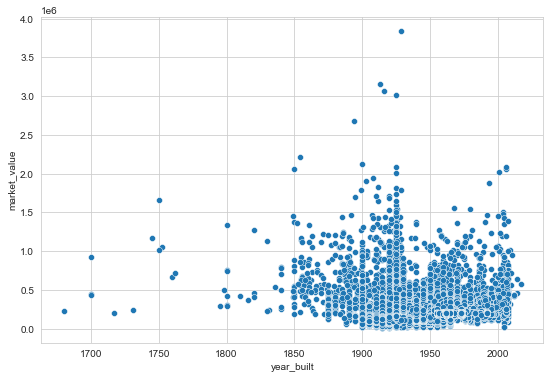

In [84]:
plt.figure(figsize= (9,6))
sns.scatterplot(df['year_built'], df['market_value'])
plt.show()

As we can see from this scatterplot, the older building is doesn't mean more expensive, and vice versa.

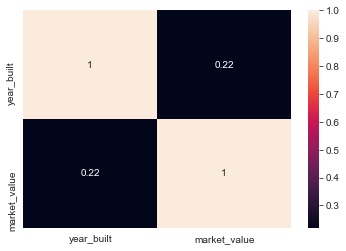

In [85]:
sns.heatmap(df[['year_built', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the correlation ratio there is a low positive correlation between year built and market value. This means that year built is low affecting the price of the property.

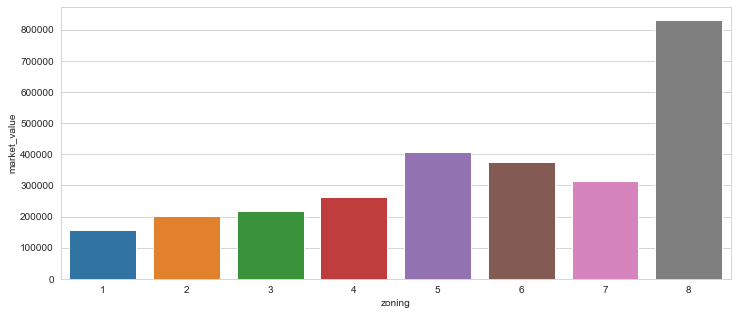

In [86]:
zoning = df[['zoning', 'market_value']].groupby('zoning').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(zoning['zoning'], zoning['market_value'])
plt.show()

As we can see from this barplot, the highest price for zoning type 8, because the higher of zoning type is having bigger area.

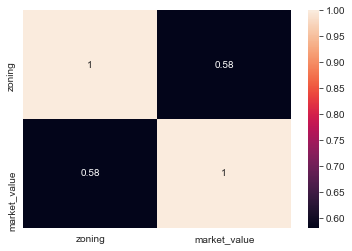

In [87]:
sns.heatmap(df[['zoning', 'market_value']].corr('spearman'), annot = True)
plt.show()

Based on the heatmap there is a linear relationship between zoning and market value. The correlation is 0.58 (moderate to strong positive correlation). This means that zoning is affecting the price of the property.

In [88]:
df[['year_built', 'building_description']].groupby(['building_description']).mean()

,year_built
building_description,
FRAME,1967.781192
MASONRY,1942.437184
MASONRY+OTHER,1951.487977
STONE,1919.898681


This is indicates that **STONE** is an antique buildings.

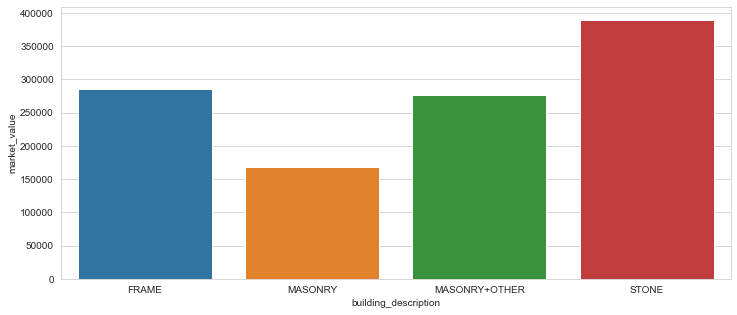

In [89]:
desc = df[['building_description', 'market_value']].groupby('building_description').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(desc['building_description'], desc['market_value'])
plt.show()

As we can see from this barplot, **STONE** has the highest price, this is indicates that the building is an antique property.
- Masonry is the building of structures from bricks, and concrete.
- Frame is the building of structures from steels. Steel is more costly than bricks but it is stronger and easier to built
- Masonry + Other is the building of structures from bricks and steels.

In [90]:
correlation_ratio(df['building_description'], df['market_value'])

0.45444722012239736

Based on the correlation ratio there is a moderate correlation between building description and market value. The correlation is 0.45. This means that building description is affecting the price of the property.

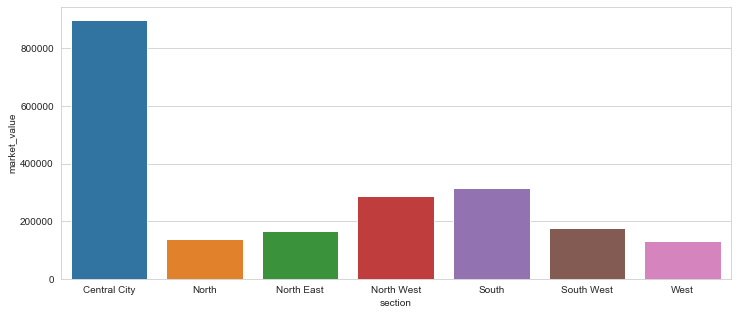

In [91]:
section = df[['section', 'market_value']].groupby('section').mean().reset_index()
plt.figure(figsize= (12,5))
sns.barplot(section['section'], section['market_value'])
plt.show()

Central City has more expensive buildings than the North therefore as we can see previously, most people prefer to have their properties up North.

In [92]:
correlation_ratio(df['section'], df['market_value'])

0.4913398118549744

Based on the correlation ratio there is a moderate correlation between section and market value. The correlation is 0.4913. This means that section is affecting the price of the property.

### ==============================================================

## Conclusion :

- The segment is divided by Market Value, Total Livable Area, Total Area, and Zoning.
- Wider total livable area & total area, having a higher market value.
- Surprisingly property that was built on below street level and flood plain are more expensive than the rest in this data. Below street level property could face a drainage problem, flood plain area are identified as flood hazard area.
- The Property which doesn't have a basements, it doesn't mean cheaper than any property which have a basement. Basement type H (partial, unfinished basement) is the lowest based on market value, because it has the smallest total livable area.
- Property using the central air has higher market value than property without the central air.
- Above Average Condition for Interior & Exterior Condition is the highest mean price for the property. Surprisingly The New / Rehabbed Interior & Exterior Condition mean price is below the Above Average.
- Attached Garage is the highest mean price for the property
- More bathrooms, mean higher market value, surprisingly for 7 bathrooms had lower value.
- More bedrooms, mean higher market value.
- Property with 4 stories have the highest mean price.
- Land Property with Uncommon land shape have the highest mean price.
- Property with more fireplaces is more expensive.
- The property with street designation Court (CT) have the highest mean price.
- Property with type heater C,D,E have the highest mean price.
- Property with view type Park/Green Area is the highest mean price.
- More expensive your building is more expensive for your tax.
- Zoning RSD1 or type 8 have the highest mean price, because it had bigger area.
- Bulding Description with STONE Structural has the highest mean price than Masonry, Frame, Masonry + Others.
- Central City has more expensive buildings than the North therefore as we can see previously, most people prefer to have their properties up North.

## Recommendation :
- Based on the price of each section, the cheapest can be found in the North. We can buy and redeveloped them on behalf of the North Philadelphia developer, to be sold on the latter-day with higher price.
- If the company prefer to build their properties from scratch, it would be better for them to purchase houses that already in poor condition and therefore below market price.
- When the company decided to buy old houses / houses that are in poor condition, it is of utmost importance to consider the budget in which will be needed to renovate them to prevent the final spending exceeding the main capital.

# --------------------------------------------------------------------------

### Now the Data is Ready for Machine Learning, we move to 5 - ML Regression.ipynb !

In [93]:
df.to_csv('PHL_Building_Dataset_ML_Regression.csv')